Student Name :Saroj Devkota

Student Id :2329255

Worksheet 1


Getting Started with Image Processing with Python.

Introduction to Python Imaging Library(PIL)
2.1 Exercise - 1:
Complete all the Task.
1. Read and display the image.

• Read the image using the Pillow library and display it.

• You can also use matplotlib to display the image.

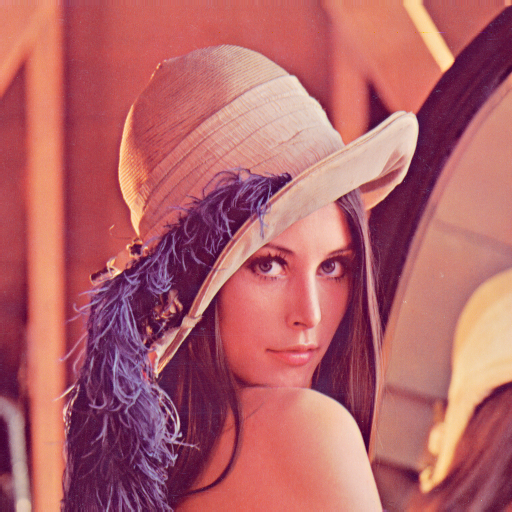

Image format:  PNG
Image size:  (512, 512)
Image mode:  RGB


In [3]:
from PIL import Image
#display image in collab
image_colored = Image.open("/content/Lenna_(test_image).png")
display(image_colored)
print("Image format: ", image_colored.format)
print("Image size: ", image_colored.size)
print("Image mode: ", image_colored.mode)

2. Display only the top left corner of 100x100 pixels.

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Converted image to NumPy array
image_array = np.array(image_colored)

# Extracted top-left 100x100 pixels
top_left = image_array[:100, :100]

# Displayed the extracted section
plt.imshow(top_left)
plt.axis("off")
plt.title("Top Left Corner (100x100)")
plt.show()

3. Show the three color channels (R, G, B).

• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

In [13]:
# Extracted RGB channels
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Displayed each channel
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(red_channel, cmap="Reds")
axes[0].set_title("Red Channel")
axes[0].axis("off")

axes[1].imshow(green_channel, cmap="Greens")
axes[1].set_title("Green Channel")
axes[1].axis("off")

axes[2].imshow(blue_channel, cmap="Blues")
axes[2].set_title("Blue Channel")
axes[2].axis("off")

plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

In [15]:
# Modified the top-left 100x100 pixels
modified_image = image_array.copy()
modified_image[:100, :100] = 210  # Light gray

# Displayed the modified image
plt.imshow(modified_image)
plt.title("Modified Image (Top 100×100 Pixels to Value 210)")
plt.axis("off")
plt.show()

2.2 Exercise - 2:

1. Load and display a grayscale image.

• Load a grayscale image using the Pillow library.

• Display the grayscale image using matplotlib.

In [16]:
second_image = Image.open("/content/cameraman.png")
display(second_image)

In [17]:
import matplotlib.pyplot as plt
plt.imshow(second_image, cmap='gray')

2. Extract and display the middle section of the image (150 pixels).

• Extract a 150 pixel section from the center of the image using NumPy array slicing.

• Display this cropped image using matplotlib.

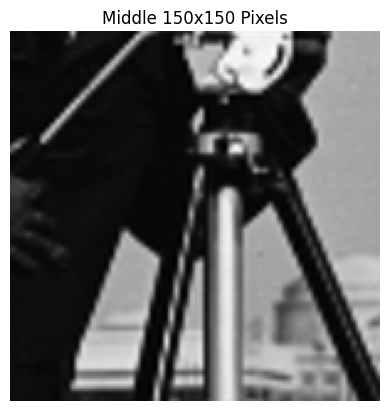

In [18]:
gray_array = np.array(second_image)
height, width = gray_array.shape

# Computed the center of the image
center_x, center_y = width // 2, height // 2

# Extracted a 150x150 section from the middle
middle_section = gray_array[center_y - 75 : center_y + 75, center_x - 75 : center_x + 75]

# Displayed extracted section
plt.imshow(middle_section, cmap="gray")
plt.title("Middle 150x150 Pixels")
plt.axis("off")
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).

• Display the resulting binary image.

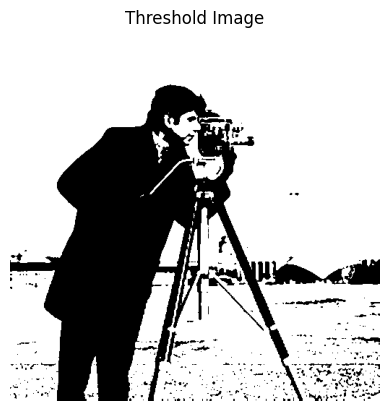

In [19]:
# Applied threshold
binary_image = np.where(gray_array < 100, 0, 255)

# Displayed binary image
plt.imshow(binary_image, cmap="gray")
plt.title("Threshold Image")
plt.axis("off")
plt.show()


4. Rotate the image 90 degrees clockwise and display the result.

• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.

• Display the rotated image using matplotlib.

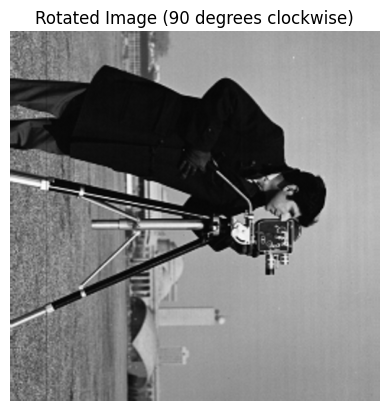

In [21]:
# Rotated image
rotated_image = second_image.rotate(-90)

# Displayed rotated image
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Image (90 degrees clockwise)")
plt.axis("off")
plt.show()

5. Convert the grayscale image to an RGB image.

• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).

• Display the converted RGB image using matplotlib.

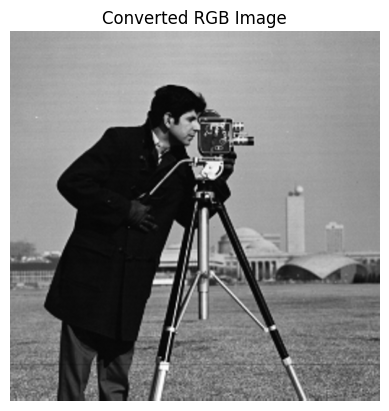

In [23]:
# Converted grayscale to RGB
rgb_image = second_image.convert("RGB")

# Displayed RGB image
plt.imshow(rgb_image)
plt.title("Converted RGB Image")
plt.axis("off")
plt.show()


3 Image Compression and Decompression using PCA.

In this exercise, build a PCA from scratch using explained variance method for image compression task.
You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
choice.

1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}

• Center the dataset - Standaridze the Data.

• Calculate the covaraince matrix of the Standaridze data.

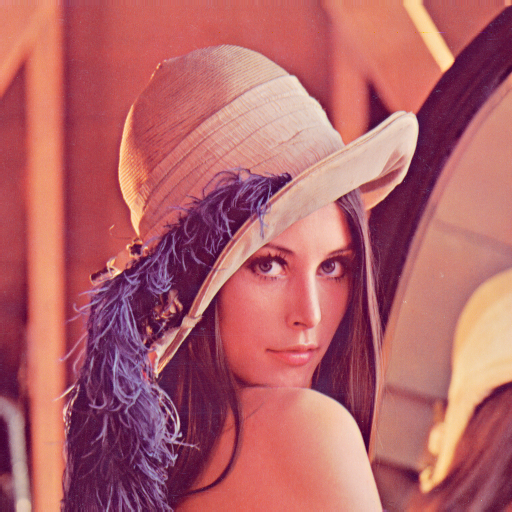

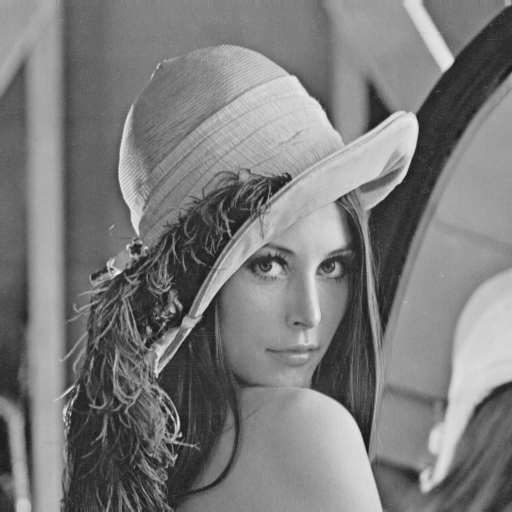

In [24]:
image = Image.open("/content/Lenna_(test_image).png")
display(image)
image_gray = image.convert("L")
display(image_gray)

In [28]:
image_array = np.array(image_gray)
print(image_array.shape)

(512, 512)


In [30]:
height , width = image_array.shape
data = image_array.reshape(height ,width)


In [31]:
mean = np . mean ( data , axis =0)
centered_data = data - mean
print(centered_data)

[[ 67.203125    67.203125    66.68554688 ...  39.52148438  24.86523438
   -2.28125   ]
 [ 67.203125    67.203125    66.68554688 ...  39.52148438  24.86523438
   -2.28125   ]
 [ 67.203125    67.203125    66.68554688 ...  39.52148438  24.86523438
   -2.28125   ]
 ...
 [-51.796875   -51.796875   -45.31445312 ... -26.47851562 -30.13476562
  -32.28125   ]
 [-50.796875   -50.796875   -40.31445312 ... -26.47851562 -25.13476562
  -22.28125   ]
 [-50.796875   -50.796875   -40.31445312 ... -26.47851562 -25.13476562
  -22.28125   ]]


In [32]:
cov_matrix = np . cov ( centered_data , rowvar = False )
print(cov_matrix)

[[1547.97431507 1547.97431507 1506.00528987 ... -465.93783635
  -438.04106531 -395.61007828]
 [1547.97431507 1547.97431507 1506.00528987 ... -465.93783635
  -438.04106531 -395.61007828]
 [1506.00528987 1506.00528987 1488.59955586 ... -518.98051079
  -493.05615903 -451.90074609]
 ...
 [-465.93783635 -465.93783635 -518.98051079 ... 3083.22850034
  3062.97256834 3029.2839408 ]
 [-438.04106531 -438.04106531 -493.05615903 ... 3062.97256834
  3071.93287901 3052.93071184]
 [-395.61007828 -395.61007828 -451.90074609 ... 3029.2839408
  3052.93071184 3068.69178082]]


2. Eigen Decomposition and Identifying Principal Components:

• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.

In [33]:
eigenvalues , eigenvectors = np . linalg . eigh ( cov_matrix )

In [34]:
sorted_indices = np . argsort ( eigenvalues ) [:: -1]
eigenvectors = eigenvectors [: , sorted_indices ]

print(eigenvectors)

[[ 3.31915472e-02  2.16054362e-02 -3.80615759e-02 ...  0.00000000e+00
  -1.99117751e-15  7.08694456e-01]
 [ 3.31915472e-02  2.16054362e-02 -3.80615759e-02 ...  2.89886997e-02
   7.31308738e-02 -7.02350869e-01]
 [ 3.41339642e-02  1.85332963e-02 -3.65387822e-02 ...  6.09478303e-02
  -4.85431655e-02 -4.70431138e-04]
 ...
 [-6.47155168e-02  9.79045095e-02  2.91671775e-02 ...  2.89197418e-02
   8.46722296e-02  2.15516428e-03]
 [-6.39685964e-02  9.79850587e-02  2.66188965e-02 ... -1.92741902e-03
  -4.22684031e-02  2.58854366e-04]
 [-6.25703903e-02  9.88573086e-02  2.32271930e-02 ...  3.15756393e-02
   3.15953397e-02  1.35152664e-03]]


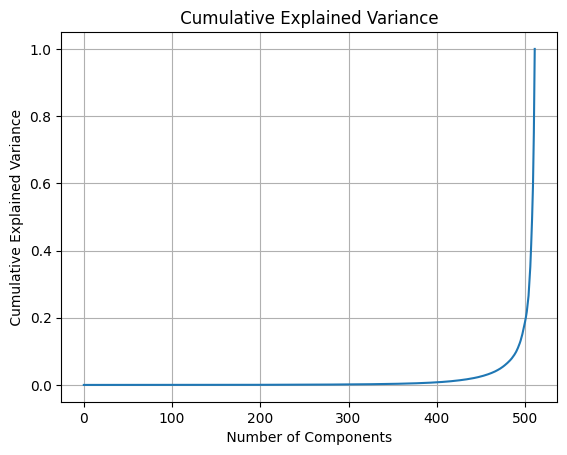

In [35]:
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

In [39]:
k1 = 7
k2 = 60
k3 = 50
k4 = 110
k5 = 160

components1 = eigenvectors [: , : k1 ]
components2 = eigenvectors [: , : k2 ]
components3 = eigenvectors [: , : k3 ]
components4 = eigenvectors [: , : k4 ]
components5 = eigenvectors [: , : k5 ]

3. Reconstruction and Experiment:


• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.


• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.


• Display the Results and Evaluate.

In [40]:
compressed_data_one = np.dot( centered_data , components1 )
decompressed_data_one = np.dot(compressed_data_one,components1.T) + mean

compressed_data_two = np.dot( centered_data , components2 )
decompressed_data_two = np.dot(compressed_data_two,components2.T) + mean

compressed_data_three = np.dot( centered_data , components3 )
decompressed_data_three = np.dot(compressed_data_three,components3.T) + mean

compressed_data_four = np.dot( centered_data , components4 )
decompressed_data_four = np.dot(compressed_data_four,components4.T) + mean

compressed_data_five = np.dot( centered_data , components5 )
decompressed_data_five = np.dot(compressed_data_five,components5.T) + mean
# print(compressed_data.shape)
# print(decompressed_data.shape)

In [41]:
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(decompressed_data_one, cmap="gray")
plt.title(f"{k1} Components")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(decompressed_data_two, cmap="gray")
plt.title(f"{k2} Components")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(decompressed_data_three, cmap="gray")
plt.title(f"{k3} Components")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(decompressed_data_four, cmap="gray")
plt.title(f"{k4} Components")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(decompressed_data_five, cmap="gray")
plt.title(f"{k5} Components")
plt.axis("off")

plt.tight_layout()
plt.show()
